# Cifar-10 이미지 분류
### 출처: [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/8fc58d2c1ffc420dac44eafee7b28cea/)

#### CIFAR10 데이터 로드

In [1]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


#### 데이터 확인

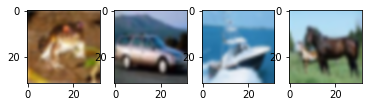

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding
    * airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [4]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### 모형 구현

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
import numpy as np

np.random.seed(0)

In [8]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"
    
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, 
                             save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

In [11]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), 
                    verbose=1, callbacks=[early_stopping_callback, checkpoint])

W0830 15:17:20.717027 16248 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 121s 2ms/step - loss: 2.3697 - acc: 0.1435 - val_loss: 2.1537 - val_acc: 0.1965

Epoch 00001: val_loss improved from inf to 2.15375, saving model to ./model/01-2.1537.hdf5
Epoch 2/50
50000/50000 [==============================] - 392s 8ms/step - loss: 1.9190 - acc: 0.2866 - val_loss: 1.7447 - val_acc: 0.3398

Epoch 00002: val_loss improved from 2.15375 to 1.74474, saving model to ./model/02-1.7447.hdf5
Epoch 3/50
50000/50000 [==============================] - 325s 7ms/step - loss: 1.7622 - acc: 0.3629 - val_loss: 1.5697 - val_acc: 0.4416

Epoch 00003: val_loss improved from 1.74474 to 1.56966, saving model to ./model/03-1.5697.hdf5
Epoch 4/50
50000/50000 [==============================] - 187s 4ms/step - loss: 1.6435 - acc: 0.4262 - val_loss: 1.5168 - val_acc: 0.4758

Epoch 00004: val_loss improved from 1.56966 to 1.51678, saving model to ./model/04-1.5168.hdf5
Epoch 5/50
50000/5

50000/50000 [==============================] - 211s 4ms/step - loss: 0.9006 - acc: 0.7942 - val_loss: 1.0864 - val_acc: 0.7431

Epoch 00040: val_loss did not improve from 0.89122
Epoch 41/50
50000/50000 [==============================] - 227s 5ms/step - loss: 0.9080 - acc: 0.7920 - val_loss: 0.9581 - val_acc: 0.7756

Epoch 00041: val_loss did not improve from 0.89122
Epoch 42/50
50000/50000 [==============================] - 207s 4ms/step - loss: 0.8927 - acc: 0.7976 - val_loss: 1.0060 - val_acc: 0.7653

Epoch 00042: val_loss did not improve from 0.89122
Epoch 43/50
50000/50000 [==============================] - 220s 4ms/step - loss: 0.8904 - acc: 0.7993 - val_loss: 0.9185 - val_acc: 0.7885

Epoch 00043: val_loss did not improve from 0.89122
Epoch 44/50
50000/50000 [==============================] - 212s 4ms/step - loss: 0.8942 - acc: 0.7964 - val_loss: 0.9624 - val_acc: 0.7758

Epoch 00044: val_loss did not improve from 0.89122
Epoch 45/50
50000/50000 [==============================] 

In [13]:
# Best Model 복원
from keras.models import load_model
del model
model = load_model('model/39-0.8912.hdf5')

In [14]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 5s 502us/step

 Test Accuracy: 0.7903


In [15]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

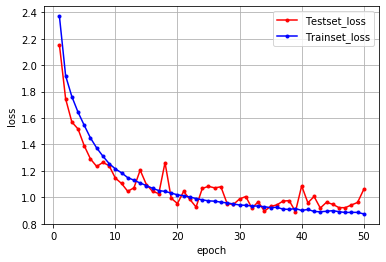

In [16]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

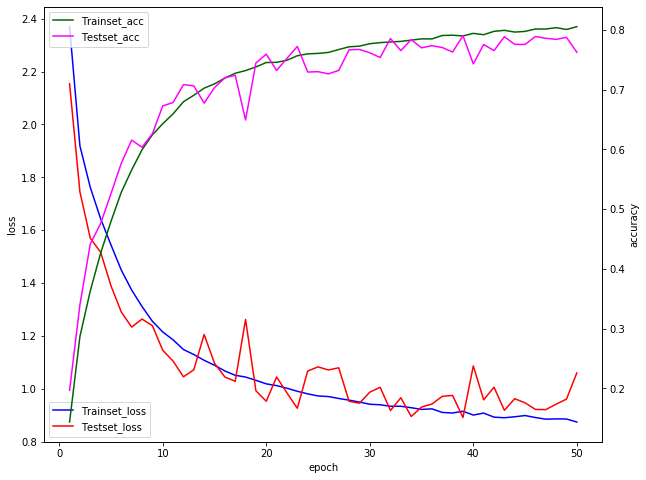

In [22]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower left')
ax1.legend(loc='upper left')
plt.show()